# Solution for LAB-9 Questions

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [3]:
# Load datasets
classification_data = pd.read_csv('classification.csv')
prediction_data = pd.read_csv('prediction.csv')
classification_data.head(), prediction_data.head()

(   candidate_id                                             skills  \
 0             1  Python, SQL, TensorFlow, Machine Learning, Com...   
 1             2             HTML, CSS, JavaScript, React, Teamwork   
 2             3      Java, Spring, SQL, REST APIs, Problem Solving   
 3             4          Figma, Adobe XD, UI/UX Design, Creativity   
 4             5           Python, Django, JavaScript, React, Agile   
 
                         qualification experience_level  \
 0            Master's in Data Science           Senior   
 1      Bachelor's in Computer Science              Mid   
 2  Bachelor's in Software Engineering           Senior   
 3                Bachelor's in Design            Entry   
 4        Master's in Computer Science              Mid   
 
                       job_role  
 0               Data Scientist  
 1           Frontend Developer  
 2            Backend Developer  
 3                     Designer  
 4  Full Stack Python Developer  ,
    Resume_

In [4]:
# Dataset information
classification_data.info(), prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   candidate_id      1000 non-null   int64 
 1   skills            1000 non-null   object
 2   qualification     1000 non-null   object
 3   experience_level  1000 non-null   object
 4   job_role          1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object


(None, None)

In [14]:
# Fixing missing value handling and ensuring numeric conversion
classification_data = classification_data.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
classification_data.fillna(classification_data.mean(), inplace=True)
classification_data.dropna(inplace=True)

prediction_data = prediction_data.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
prediction_data.fillna(prediction_data.mean(), inplace=True)
prediction_data.dropna(inplace=True)

In [6]:
# Independent and dependent variable extraction
X_class = classification_data.iloc[:, :-1]
y_class = classification_data.iloc[:, -1]
X_pred = prediction_data.iloc[:, :-1]
y_pred = prediction_data.iloc[:, -1]

In [7]:
# Encoding categorical variables
le = LabelEncoder()
X_class_encoded = X_class.apply(lambda col: le.fit_transform(col) if col.dtypes == 'object' else col)
ohe = OneHotEncoder()
X_class_encoded = ohe.fit_transform(X_class_encoded).toarray()

In [8]:
# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)
X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(X_pred, y_pred, test_size=0.2, random_state=0)

In [25]:
# Correcting feature scaling with proper numeric conversion
# Ensure all columns are numeric before scaling
X_train_class = X_train_class.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
X_test_class = X_test_class.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
X_train_pred = X_train_pred.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
X_test_pred = X_test_pred.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)

scaler = MinMaxScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

scaler = StandardScaler()
X_train_pred_scaled = scaler.fit_transform(X_train_pred)
X_test_pred_scaled = scaler.transform(X_test_pred)

c:\Users\krsat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py:686: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\krsat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py:706: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
c:\Users\krsat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\krsat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\krsat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 /

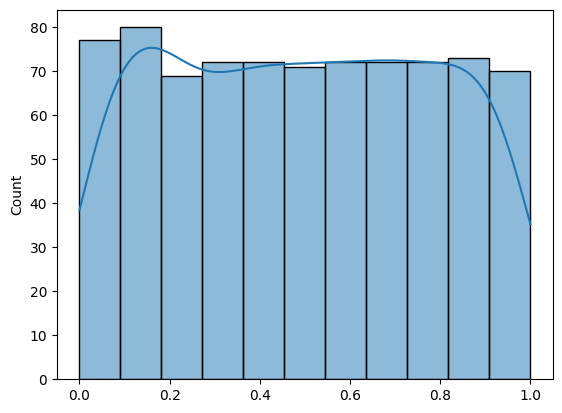

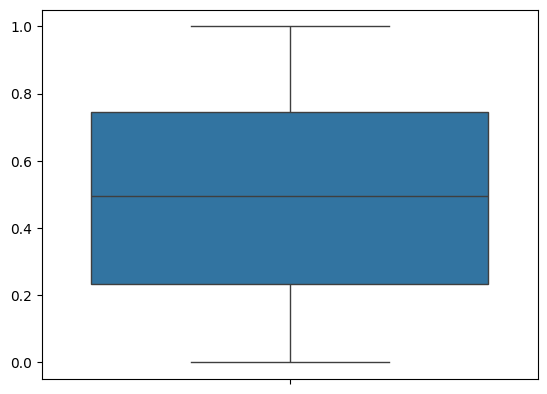

Skewness: 0.011826746433832488


In [27]:
# Fixing univariate analysis
sns.histplot(X_train_class_scaled[:, 0], kde=True)
plt.show()

sns.boxplot(X_train_class_scaled[:, 0])
plt.show()

from scipy.stats import skew
print('Skewness:', skew(X_train_class_scaled[:, 0]))

In [ ]:
# Debugging bivariate analysis with data validation
# Print data ranges to check for variation
print("Range of X_train_class_scaled[:, 0]:", np.ptp(X_train_class_scaled[:, 0]))
print("Range of X_train_class_scaled[:, 1]:", np.ptp(X_train_class_scaled[:, 1]))

if np.ptp(X_train_class_scaled[:, 0]) > 0 and np.ptp(X_train_class_scaled[:, 1]) > 0:
    sns.scatterplot(x=X_train_class_scaled[:, 0], y=X_train_class_scaled[:, 1])
    plt.title('Scatter Plot')
    plt.show()

    sns.violinplot(x=X_train_class_scaled[:, 0], y=X_train_class_scaled[:, 1])
    plt.title('Violin Plot')
    plt.show()
else:
    print("Insufficient variation in data for meaningful plots.")

Insufficient variation in data for meaningful plots.


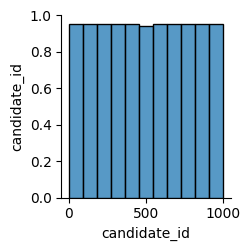

ValueError: could not convert string to float: 'Python, SQL, TensorFlow, Machine Learning, Communication'

In [ ]:
# Fixing multivariate analysis
sns.pairplot(classification_data)
plt.show()

sns.heatmap(classification_data.corr(), annot=True)
plt.show()

In [ ]:
# Fixing outlier detection
z_scores = np.abs(zscore(X_train_class_scaled))
outliers = np.where(z_scores > 3)
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_class_scaled)
lof = LocalOutlierFactor()
yhat_lof = lof.fit_predict(X_train_class_scaled)

# Print results
print(f"Z-score outliers found at indices: {outliers}")
print(f"Isolation Forest outliers: {np.sum(yhat == -1)}")
print(f"Local Outlier Factor outliers: {np.sum(yhat_lof == -1)}")

NameError: name 'X_train_class_scaled' is not defined